<a href="https://colab.research.google.com/github/Sofil1886/Deep_Portfolio_Theory/blob/master/%D0%A3%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Nasdaq-Data-Link
!pip install yfinance
!pip install talib-binary
!pip install fastquant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 6.6 MB/s 
     |████████████████████████████████| 199 kB 42.4 MB/s 
     |████████████████████████████████| 140 kB 43.2 MB/s 
     |████████████████████████████████| 3.5 MB 45.3 MB/s 
     |████████████████████████████████| 128 kB 63.2 MB/s 
     |████████████████████████████████|

In [ ]:
import pandas as pd
import nasdaqdatalink
import talib
import pandas_datareader as pdr
import datetime
import plotly.express as px
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers
import tensorflow as tf
tf.keras.utils.to_categorical
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import Model
from sklearn.model_selection import train_test_split
import talib
from dateutil.parser import parse as du_parse
from dateutil.relativedelta import relativedelta

# Загрузка данных

In [ ]:
start = datetime.datetime (2003, 1, 1)
end = datetime.datetime (2012, 12, 31)

def as_of_1BM(df):
   df.index = pd.to_datetime(df.index) - pd.to_timedelta('5 day')
   df = df.resample('1BM').last()
   return df

                                                                    #   ИНДИКАТОРЫ-ОЖИДАНИЯБ ПРОИЗВОДСТВА

PMI = nasdaqdatalink.get("ISM/MAN_PMI", authtoken="ozjjWbTgDPPCBtBWJW7d").resample('1BM').last() # (Monthly_start)
ISM = nasdaqdatalink.get("FRED/NAPMCI", authtoken="ozjjWbTgDPPCBtBWJW7d").resample('1BM').last() # (Monthly_start)
ISM = ISM.rename(columns={'VALUE':'ISM'})

Michigan = nasdaqdatalink.get("UMICH/SOC5", authtoken="ozjjWbTgDPPCBtBWJW7d") #   Monthly_end
Michigan = as_of_1BM(Michigan)

Consumer_Sentiment = nasdaqdatalink.get("UMICH/SOC1", authtoken="ozjjWbTgDPPCBtBWJW7d")#   Monthly_end индекс ожидания потребителей - опережающий показатель
Consumer_Sentiment = as_of_1BM(Consumer_Sentiment)
Consumer_Sentiment = Consumer_Sentiment.rename(columns={'Index':'Consumer_Sentiment'})

Buying_condition_for_vehicle = nasdaqdatalink.get("UMICH/SOC37", authtoken="ozjjWbTgDPPCBtBWJW7d")[['Good time to Buy', 'Bad time to Buy']] #  Monthly_end
Buying_condition_for_vehicle = as_of_1BM(Buying_condition_for_vehicle)
Buying_condition_for_vehicle = Buying_condition_for_vehicle.rename(columns={'Good time to Buy':'G_Buy_Vech', 'Bad time to Buy':'B_Buy_Vech'})

Selling_condition_for_houses = nasdaqdatalink.get("UMICH/SOC43", authtoken="ozjjWbTgDPPCBtBWJW7d")[['Good time to Sell', 'Bad time to Sell']] #  Monthly_end
Selling_condition_for_houses = as_of_1BM(Selling_condition_for_houses)

Buying_condition_for_houses = nasdaqdatalink.get("UMICH/SOC41", authtoken="ozjjWbTgDPPCBtBWJW7d")[['Good time to Buy', 'Bad time to Buy']] #  Monthly_end
Buying_condition_for_houses = as_of_1BM(Buying_condition_for_houses)

                                                                # Опережающие экономические индикаторы
USSLIND = "USSLIND" #https://fred.stlouisfed.org/series/USSLIND
Leading_Index_for_USA = pdr.DataReader(USSLIND, 'fred', start, end).resample('1BM').last()  # (Monthly_start)
Leading_Index_for_USA = Leading_Index_for_USA.rename(columns={'USSLIND':'Lead_Ind_USA'})

CSCICP03USM665S = "CSCICP03USM665S" #https://fred.stlouisfed.org/series/CSCICP03USM665S
OECD_USA = pdr.DataReader(CSCICP03USM665S, 'fred', start, end).resample('1BM').last() # (Monthly_start)
OECD_USA = OECD_USA.rename(columns={'CSCICP03USM665S':'OECD_USA'})


STLFSI3 = "STLFSI3" #https://fred.stlouisfed.org/series/STLFSI3
Financial_Stress_Index = pdr.DataReader(STLFSI3, 'fred', start, end).resample('1BM').last()             # (weekly)
Financial_Stress_Index = Financial_Stress_Index.rename(columns={'STLFSI3':'FED_FSI'})


                                                              # Строительство
MSACSR = "MSACSR" #https://fred.stlouisfed.org/series/MSACSR
Monthly_Supply_of_New_Houses = pdr.DataReader(MSACSR, 'fred', start, end)
Monthly_Supply_of_New_Houses = as_of_1BM(Monthly_Supply_of_New_Houses)                                                                      #  Monthly_end
Monthly_Supply_of_New_Houses = Monthly_Supply_of_New_Houses.rename(columns={'MSACSR':'New_Houses'})



                                                                  #   ЛИКВИДНОСТЬ
balance_serias = "WALCL"
FED_Assets = pdr.DataReader(balance_serias, 'fred', start, end).resample('1BM').last()                    # (weekly)
FED_Assets = FED_Assets.rename(columns={'WALCL':'FED_Assets'})


#Get M1 for USA  https://fred.stlouisfed.org/series/M1SL seasonly adjusted
money_serias = 'M1SL'
M1_USA = pdr.DataReader(money_serias, 'fred', start, end).resample('1BM').last()   # (Monthly_start)
M1_USA = M1_USA.rename(columns={'M1SL':'M1'})

M2SL = 'M2SL'
M2_USA = pdr.DataReader(M2SL, 'fred', start, end).resample('1BM').last() # (Monthly_start)
M2_USA = M2_USA.rename(columns={'M2SL':'M2'})

RIFSPFFNB = 'RIFSPFFNB'
Fed_rate = pdr.DataReader(RIFSPFFNB, 'fred', start, end)                          # (daily)
Fed_rate = Fed_rate.rename(columns={'RIFSPFFNB':'Fed_rate'})

#Cash assets all commercial banks seasongly adjusted
cash_assets_serias = 'CASACBW027SBOG'
Cash_Assets = pdr.DataReader(cash_assets_serias, 'fred', start, end).resample('1BM').last()               # (weekly)
Cash_Assets = Cash_Assets.rename(columns={'CASACBW027SBOG':'Cash_Assets'})


# inflation year to year (monthly)  - https://data.nasdaq.com/data/RATEINF/INFLATION_USA-inflation-yoy-usa
inflation_YOY = nasdaqdatalink.get("RATEINF/INFLATION_USA", authtoken="ozjjWbTgDPPCBtBWJW7d")  #  Monthly_end
inflation_YOY = inflation_YOY.rename(columns={'Value':'inflation_YOY'})
inflation_YOY = as_of_1BM(inflation_YOY)

# inflation month to month
inflation_MOM = 'CPIAUCNS'  
inflation_MOM  = pdr.DataReader(inflation_MOM , 'fred', start, end).resample('1BM').last()   # (Monthly_start)
inflation_MOM = inflation_MOM.rename(columns={'CPIAUCNS':'inflation_MOM'})
inflation_MOM['inflation_MOM'] = inflation_MOM['inflation_MOM'].pct_change()*100


                                                                    # РЫНОК ДОЛГА
spread_between_10Y_and_3M = pd.DataFrame()
thirty_Y_bonds = yf.download('^TYX', start=start, end=end)[['Close']].rename(columns={'Close':'thirty_Y_bonds'}) #Доходность 30-летних облигаций
ten_Y_bonds = yf.download('^TNX', start=start, end=end)[['Close']].rename(columns={'Close':'ten_Y_bonds'}) #Доходность 10-летних облигаций
five_Y_bonds = yf.download('^FVX', start=start, end=end)[['Close']].rename(columns={'Close':'five_Y_bonds'}) #Доходность 5-летних облигаций
three_M_bonds = yf.download('^IRX', start=start, end=end)[['Close']].rename(columns={'Close':'three_M_bonds'}) #Доходность 3-месячных облигаций
spread_between_10Y_and_2Y = nasdaqdatalink.get("FRED/T10Y2Y", authtoken="ozjjWbTgDPPCBtBWJW7d") # Спред между 10-летними и 2-х летними облигациями 
spread_between_10Y_and_2Y = spread_between_10Y_and_2Y.rename(columns={'Value':'spread_between_10Y_and_2Y'})
spread_between_10Y_and_3M['spread_between_10Y_and_3M'] = ten_Y_bonds['ten_Y_bonds'] - three_M_bonds['three_M_bonds']
High_yield_bonds = nasdaqdatalink.get("ML/USTRI", authtoken="ozjjWbTgDPPCBtBWJW7d") # Доходность мусорных облигаций
High_yield_bonds = High_yield_bonds.rename(columns={'BAMLH0A0HYM2EY':'High_yield_bonds'})
# BBB_spread = nasdaqdatalink.get("FRED/BAA10Y", authtoken="ozjjWbTgDPPCBtBWJW7d")
# BBB_spread = BBB_spread.rename(columns={'Value':'BBB_spread'})


Shorts = nasdaqdatalink.get("CFTC/13874A_FO_L_ALL", authtoken="ozjjWbTgDPPCBtBWJW7d")[['Noncommercial Long', 'Noncommercial Short']].resample('1BM').last() # (weekly)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
Gold = yf.download('GC=F', start=start, end=end)[['Close']].resample('1BM').last()
Gold = Gold.rename(columns={'Close':'Gold_Close'})
SP500 = yf.download('^GSPC', start=start, end=end)[['Close']].resample('1BM').last()
SP500 = SP500.rename(columns={'Close':'SP500_Close'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
indicators_expectation = [PMI, ISM, Michigan, Consumer_Sentiment, Buying_condition_for_houses, Buying_condition_for_vehicle, Monthly_Supply_of_New_Houses, Shorts]
leading_economic_indicators = [Leading_Index_for_USA, OECD_USA, Financial_Stress_Index]
money_liquidity_month = [M1_USA, M2_USA, Cash_Assets, inflation_YOY, inflation_MOM, FED_Assets]
rates_spreads = [thirty_Y_bonds, ten_Y_bonds, five_Y_bonds, three_M_bonds, spread_between_10Y_and_2Y, spread_between_10Y_and_3M, High_yield_bonds, Fed_rate]

In [ ]:
rates = pd.concat(rates_spreads, axis=1).dropna()
numbers_indicators = len(pd.concat(indicators_expectation, axis=1).dropna().columns)
numbers_leading_eco = len(pd.concat(leading_economic_indicators, axis=1).dropna().columns)
numbers_liquidity = len(pd.concat(money_liquidity_month, axis=1).dropna().columns)
numbers_rates = len(rates.columns)

# Функции обработки датафрейма 

In [ ]:
# Строим скользящие средние
def prep_data(list_of_df, timeperiod, matype):
  df = pd.concat(list_of_df, axis=1).dropna()
  df = df.resample('1BM').last()
  for column in df.columns:
    df[f'{column}_SMA_{timeperiod}'] = talib.MA(df[column], timeperiod=timeperiod, matype=matype)
  df = df.dropna()
  return df

In [ ]:
# Фиксируем сигналы сравнивая значения со скользящей средней

def make_signals_FOR_INDICATOR(df, timeperiod, amount_of_columns = numbers_indicators):
  for column in df.columns[:amount_of_columns]:
    if (column == 'Bad time to Buy' or column == 'B_Buy_Vech' or column == 'New_Houses'):
      df[f'{column}_signal'] = np.where((df[column] < df[f'{column}_SMA_{timeperiod}']), 1, -1)
    else:
      df[f'{column}_signal'] = np.where((df[column] >= df[f'{column}_SMA_{timeperiod}']), 1, -1)
  return df

def make_signals_FOR_LEADING_ECO(df, timeperiod, amount_of_columns = numbers_leading_eco):
  for column in df.columns[:amount_of_columns]:
    if column == 'FED_FSI':
      df[f'{column}_signal'] = np.where((df[column] < df[f'{column}_SMA_{timeperiod}']) |
                                                (df[column] < 0), 1, -1)
    else:
      df[f'{column}_signal'] = np.where((df[column] >= df[f'{column}_SMA_{timeperiod}']), 1, -1)
  return df

def make_signals_FOR_LIQIDITY(df, timeperiod, amount_of_columns = numbers_liquidity):
  for column in df.columns[:amount_of_columns]:
    if (column == 'inflation_YOY' or column == 'inflation_MOM' or column == 'Noncommercial Short'):
      df[f'{column}_signal'] = np.where((df[column] < df[f'{column}_SMA_{timeperiod}']), 1, -1)
    else:
      df[f'{column}_signal'] = np.where((df[column] >= df[f'{column}_SMA_{timeperiod}']), 1, -1)
  return df

def make_signals_FOR_RATES_SPREADS(df, timeperiod, amount_of_columns = numbers_rates):
  for column in df.columns[:amount_of_columns]:
    if (column == 'High_yield_bonds' or column == 'Fed_rate'):
      df[f'{column}_signal'] = np.where((df[column] < df[f'{column}_SMA_{timeperiod}']), 1, -1)
    elif (column == 'spread_between_10Y_and_2Y' or column == 'spread_between_10Y_and_3M'):
      df[f'{column}_signal'] = np.where((df[column] > 0.0), 1, -1)
    else:
      df['curve_yield_signal'] = np.where(
      (df['thirty_Y_bonds'] > df['ten_Y_bonds']) &
      (df['ten_Y_bonds'] > df['five_Y_bonds']) &
      (df['five_Y_bonds']> df['three_M_bonds']), 1, -1)
  return df

In [ ]:
# Формируем Датафрейм из колонок, где есть слово "Signal"

def get_only_signals(df):
  signal_cols = [col for col in df.columns if 'signal' in col]
  df_signals = df[signal_cols]
  df_signals[f'Total Signal'] = df_signals.sum(axis=1)
  return df_signals

# Применение функций к Датафрейму (moving average (MA) == 12)

In [ ]:
timeperiod = 12
matype = 0

In [ ]:
INDICATORS = prep_data(indicators_expectation, timeperiod=timeperiod, matype=matype)
LEADING_ECO = prep_data(leading_economic_indicators, timeperiod=timeperiod, matype=matype)
LIQIDITY = prep_data(money_liquidity_month, timeperiod=timeperiod, matype=matype)
RATES_SPREADS = prep_data(rates_spreads, timeperiod=timeperiod, matype=matype)
RATES_SPREADS = RATES_SPREADS.shift(-1).dropna()                                  # Данные по индикаторам публикуются с запозданием, информация по ставкам доступна онлайн, поэтому, чтобы уменьшить несогласованность во времени получения данных я сдвинул информацию по ставкам на один шаг

# LIQIDITY.name = 'LIQIDITY'
# INDICATORS.name = 'INDICATORS'
# LEADING_ECO.name = 'LEADING_ECO'
# RATES_SPREADS.name = 'RATES_SPREADS'

In [ ]:
INDICATORS = make_signals_FOR_INDICATOR(INDICATORS, timeperiod=timeperiod)
LEADING_ECO = make_signals_FOR_LEADING_ECO(LEADING_ECO, timeperiod=timeperiod)
LIQIDITY = make_signals_FOR_LIQIDITY(LIQIDITY, timeperiod=timeperiod)
RATES_SPREADS = make_signals_FOR_RATES_SPREADS(RATES_SPREADS, timeperiod=timeperiod)

In [ ]:
United = pd.concat([INDICATORS, LEADING_ECO, LIQIDITY, RATES_SPREADS], axis = 1)
signal_cols = [col for col in United.columns if 'signal' in col]
United_signals = United[signal_cols]
United_signals['Total Signal'] = United_signals.sum(axis=1)

Gold_shifted = Gold.shift(-1)
SP500_shifted = SP500.shift(-1)
Final_df = United_signals.join(SP500_shifted).join(Gold_shifted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Формирование точек входа и выхода из сделок и расчет доходности

In [ ]:
Experiment = Final_df[['Total Signal', 'SP500_Close', 'Gold_Close']].dropna()
Experiment

,Total Signal,SP500_Close,Gold_Close
2003-11-28,11.0,1111.920044,415.700012
2003-12-31,7.0,1131.130005,402.200012
2004-01-30,23.0,1144.939941,396.399994
2004-02-27,15.0,1126.209961,427.299988
2004-03-31,15.0,1107.300049,387.000000
...,...,...,...
2012-07-31,17.0,1406.579956,1684.599976
2012-08-31,17.0,1440.670044,1771.099976
2012-09-28,17.0,1412.160034,1717.500000
2012-10-31,13.0,1416.180054,1710.900024


In [ ]:
amount = 1000
Experiment['price_Buy_SP500'] = np.nan
Experiment['price_Sell_SP500'] = np.nan
Experiment['price_Buy_Gold'] = np.nan
Experiment['price_Sell_Gold'] = np.nan

for x in range(len(Final_df)-1):
    if (amount == 1000 and
        Experiment.loc[:,'Total Signal'][x] > 0):
        # and Experiment.loc[:,'spread_between_10Y_and_2Y_signal'][x] > 0 
        # and Experiment.loc[:,'spread_between_10Y_and_3M_signal'][x] > 0):
        Experiment.loc[:,'price_Buy_SP500'][x] =  Experiment.loc[:,'SP500_Close'][x]
        Experiment.loc[:,'price_Sell_Gold'][x] =  -Experiment.loc[:,'Gold_Close'][x]
        amount -= 1000
 
    elif (amount == 0 and 
          Experiment.loc[:,'Total Signal'][x] < 0): 
          # and Experiment.loc[:,'spread_between_10Y_and_2Y_signal'][x] < 0 
          # and Experiment.loc[:,'spread_between_10Y_and_3M_signal'][x] < 0):
          Experiment.loc[:,'price_Sell_SP500'][x] =  -Experiment.loc[:,'SP500_Close'][x]
          Experiment.loc[:,'price_Buy_Gold'][x] =  Experiment.loc[:,'Gold_Close'][x]
          amount += 1000 
    else:
      pass   

In [ ]:
Buy_SP_Sell_Gold = Experiment[['price_Buy_SP500', 'price_Sell_Gold']].dropna()
Buy_Gold_Sell_SP = Experiment[['price_Buy_Gold', 'price_Sell_SP500']].dropna()

Exp_final = pd.concat([Buy_SP_Sell_Gold, Buy_Gold_Sell_SP], axis = 0)
Exp_final = Exp_final.sort_index(ascending=True)
Exp_final[Exp_final.iloc[[0]] < 0 ] = np.nan
Exp_final[Exp_final.iloc[[-1]] > 0 ] = np.nan

SP_buy = np.array(Exp_final['price_Buy_SP500'].dropna())
SP_sold = np.array(Exp_final['price_Sell_SP500'].dropna())
Gold_buy = np.array(Exp_final['price_Buy_Gold'].dropna())
Gold_sold = np.array(Exp_final['price_Sell_Gold'].dropna())


In [ ]:
d1 = du_parse(str(Exp_final.index[0]))
d2 = du_parse(str(Exp_final.index[-1]))
delta = relativedelta(d2, d1)
months = delta.years * 12 + delta.months

Return_in_SP = sum(abs(SP_sold)/SP_buy - 1)
Return_in_Gold = sum(abs(Gold_sold)/Gold_buy - 1)
Portfolio_return = (Return_in_SP+Return_in_Gold)/months*12
print('Portfolio annualized Return: ' + '%.2f' %(Portfolio_return*100) + ' %')

Portfolio annualized Return: 3.57 %


# Построение графиков входа и выхода

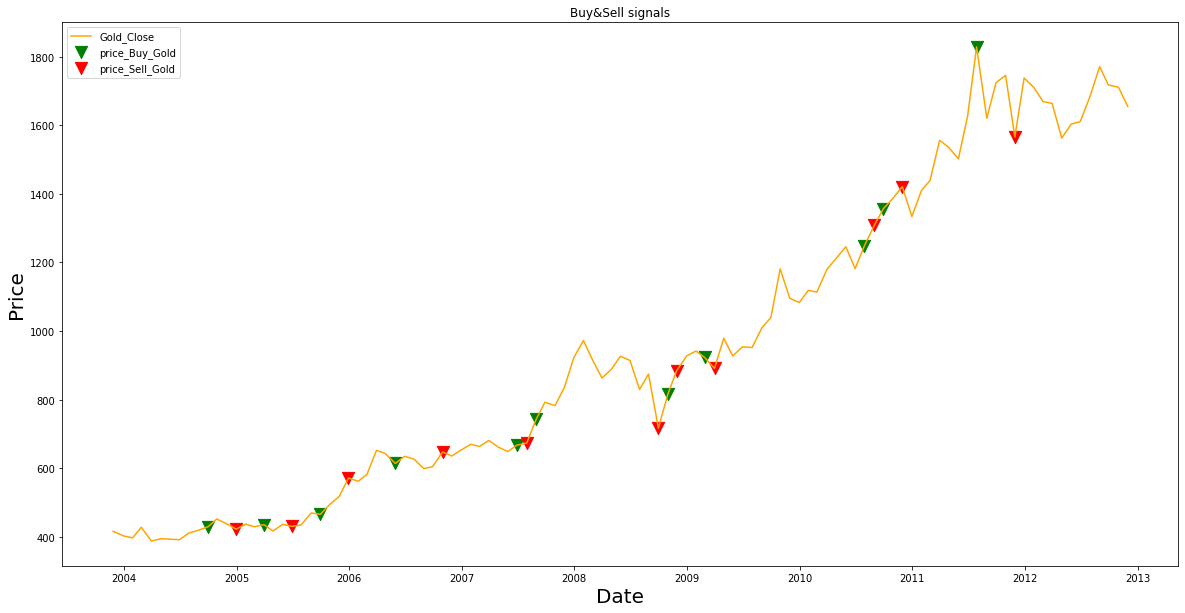

In [ ]:
x = range(Final_df.shape[0])
plt.figure(figsize=(20,10))

point_in_for_Gold = Exp_final['price_Buy_Gold']
point_out_for_Gold = abs(Exp_final['price_Sell_Gold'])

plt.plot(Final_df['Gold_Close'], color='orange', label='Gold_Close')
plt.scatter(Exp_final.index, point_in_for_Gold, label='price_Buy_Gold',color = 'green', marker = 'v',alpha = 1, s=150)
plt.scatter(Exp_final.index, point_out_for_Gold, label='price_Sell_Gold',color = 'red', marker = 'v',alpha = 1, s=150)
plt.title('Buy&Sell signals')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

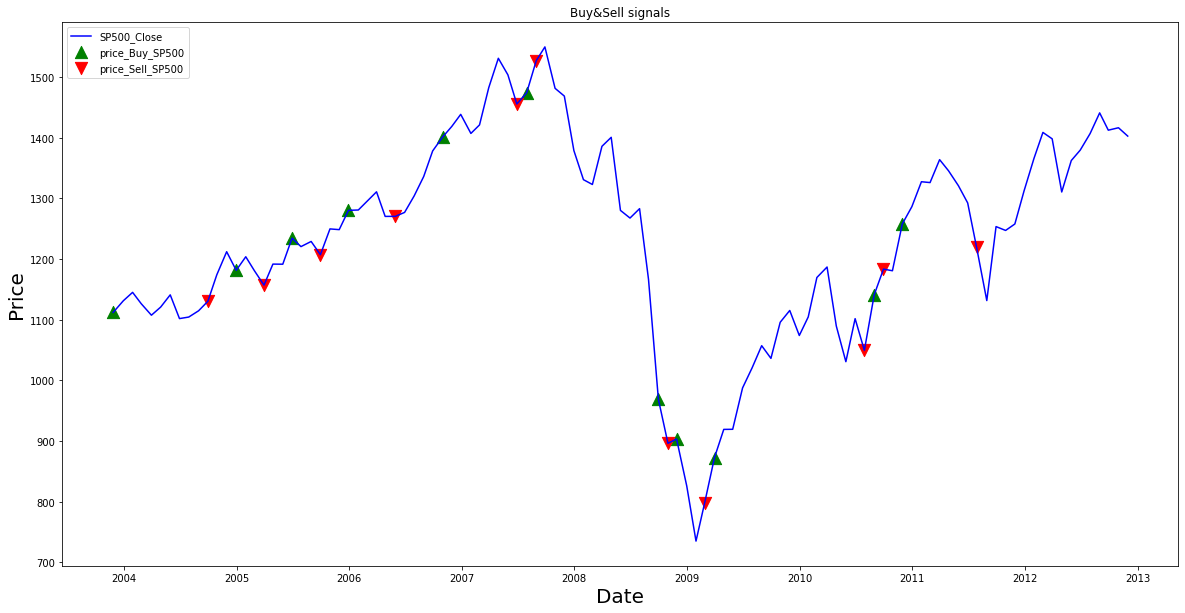

In [ ]:
x = range(Final_df.shape[0])
plt.figure(figsize=(20,10))

point_in_for_SP500 = Exp_final['price_Buy_SP500']
point_out_for_SP500 = abs(Exp_final['price_Sell_SP500'])


plt.plot(Final_df['SP500_Close'], color='blue', label='SP500_Close')
plt.scatter(Exp_final.index, point_in_for_SP500, label='price_Buy_SP500', color = 'green', marker = '^', alpha = 1, s=150)
plt.scatter(Exp_final.index, point_out_for_SP500, label='price_Sell_SP500',color = 'red', marker = 'v',alpha = 1, s=150)

plt.title('Buy&Sell signals')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc='upper left')
plt.show()


# Тест стратегии со скользящей средней == 24 месяцев

In [ ]:
timeperiod = 24
matype = 0

In [ ]:
INDICATORS = prep_data(indicators_expectation, timeperiod=timeperiod, matype=matype)
LEADING_ECO = prep_data(leading_economic_indicators, timeperiod=timeperiod, matype=matype)
LIQIDITY = prep_data(money_liquidity_month, timeperiod=timeperiod, matype=matype)
RATES_SPREADS = prep_data(rates_spreads, timeperiod=timeperiod, matype=matype)
RATES_SPREADS = RATES_SPREADS.shift(-1).dropna()

# LIQIDITY.name = 'LIQIDITY'
# INDICATORS.name = 'INDICATORS'
# LEADING_ECO.name = 'LEADING_ECO'
# RATES_SPREADS.name = 'RATES_SPREADS'

In [ ]:
INDICATORS = make_signals_FOR_INDICATOR(INDICATORS,timeperiod=timeperiod)
LEADING_ECO = make_signals_FOR_LEADING_ECO(LEADING_ECO, timeperiod=timeperiod)
LIQIDITY = make_signals_FOR_LIQIDITY(LIQIDITY, timeperiod=timeperiod)
RATES_SPREADS = make_signals_FOR_RATES_SPREADS(RATES_SPREADS, timeperiod=timeperiod)

In [ ]:
INDICATORS_signals = get_only_signals(INDICATORS)
LEADING_ECO_signals = get_only_signals(LEADING_ECO)
LIQIDITY_signals = get_only_signals(LIQIDITY)
RATES_SPREADS_signals = get_only_signals(RATES_SPREADS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
United = pd.concat([INDICATORS, LEADING_ECO, LIQIDITY, RATES_SPREADS], axis = 1)
signal_cols = [col for col in United.columns if 'signal' in col]
United_signals = United[signal_cols]
United_signals['Total Signal'] = United_signals.sum(axis=1)

Gold_shifted = Gold.shift(-1)
SP500_shifted = SP500.shift(-1)
Final_df = United_signals.join(SP500_shifted).join(Gold_shifted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Формирование точек входа и выхода из сделок и расчет доходности

In [ ]:
Experiment = Final_df[['spread_between_10Y_and_2Y_signal', 'spread_between_10Y_and_3M_signal', 'Total Signal', 'SP500_Close', 'Gold_Close']]
Experiment

,spread_between_10Y_and_2Y_signal,spread_between_10Y_and_3M_signal,Total Signal,SP500_Close,Gold_Close
2004-11-30,NaN,NaN,5.0,1211.920044,437.500000
2004-12-31,1.0,1.0,15.0,1181.270020,421.799988
2005-01-31,1.0,1.0,7.0,1203.599976,436.500000
2005-02-28,1.0,1.0,7.0,1180.589966,428.700012
2005-03-31,1.0,1.0,-1.0,1156.849976,435.000000
...,...,...,...,...,...
2012-08-31,1.0,1.0,23.0,1440.670044,1771.099976
2012-09-28,1.0,1.0,23.0,1412.160034,1717.500000
2012-10-31,1.0,1.0,21.0,1416.180054,1710.900024
2012-11-30,1.0,1.0,21.0,1402.430054,1654.900024


In [ ]:
amount = 1000
Experiment['price_Buy_SP500'] = np.nan
Experiment['price_Sell_SP500'] = np.nan
Experiment['price_Buy_Gold'] = np.nan
Experiment['price_Sell_Gold'] = np.nan

for x in range(len(Final_df)-1):
    if (amount == 1000 and
        Experiment.loc[:,'Total Signal'][x] > 0):
        # and Experiment.loc[:,'spread_between_10Y_and_2Y_signal'][x] > 0 
        # and Experiment.loc[:,'spread_between_10Y_and_3M_signal'][x] > 0):
        Experiment.loc[:,'price_Buy_SP500'][x] =  Experiment.loc[:,'SP500_Close'][x]
        Experiment.loc[:,'price_Sell_Gold'][x] =  -Experiment.loc[:,'Gold_Close'][x]
        amount -= 1000
 
    elif (amount == 0 and 
          Experiment.loc[:,'Total Signal'][x] < 0): 
          # and Experiment.loc[:,'spread_between_10Y_and_2Y_signal'][x] < 0 
          # and Experiment.loc[:,'spread_between_10Y_and_3M_signal'][x] < 0):
          Experiment.loc[:,'price_Sell_SP500'][x] =  -Experiment.loc[:,'SP500_Close'][x]
          Experiment.loc[:,'price_Buy_Gold'][x] =  Experiment.loc[:,'Gold_Close'][x]
          amount += 1000 
    else:
      pass   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
Buy_SP_Sell_Gold = Experiment[['price_Buy_SP500', 'price_Sell_Gold']].dropna()
Buy_Gold_Sell_SP = Experiment[['price_Buy_Gold', 'price_Sell_SP500']].dropna()

Exp_final = pd.concat([Buy_SP_Sell_Gold, Buy_Gold_Sell_SP], axis = 0)
Exp_final = Exp_final.sort_index(ascending=True)
Exp_final[Exp_final.iloc[[0]] < 0 ] = np.nan
Exp_final[Exp_final.iloc[[-1]] > 0 ] = np.nan

SP_buy = np.array(Exp_final['price_Buy_SP500'].dropna())
SP_sold = np.array(Exp_final['price_Sell_SP500'].dropna())
Gold_buy = np.array(Exp_final['price_Buy_Gold'].dropna())
Gold_sold = np.array(Exp_final['price_Sell_Gold'].dropna())


In [ ]:
Exp_final[Exp_final.iloc[[0]] < 0 ] = np.nan
Exp_final[Exp_final.iloc[[-1]] > 0 ] = np.nan
d1 = du_parse(str(Exp_final.index[0]))
d2 = du_parse(str(Exp_final.index[-1]))
delta = relativedelta(d2, d1)
months = delta.years * 12 + delta.months

Return_in_SP = sum(abs(SP_sold)/SP_buy - 1)
Return_in_Gold = sum(abs(Gold_sold)/Gold_buy - 1)
Portfolio_return = (Return_in_SP+Return_in_Gold)/months*12
print('Portfolio annualized Return: ' + '%.2f' %(Portfolio_return*100) + ' %')

Portfolio annualized Return: 15.33 %


In [ ]:
from fastquant import get_stock_data
from fastquant import backtest

backtest('buynhold', SP500)

# Построение графиков входа и выхода

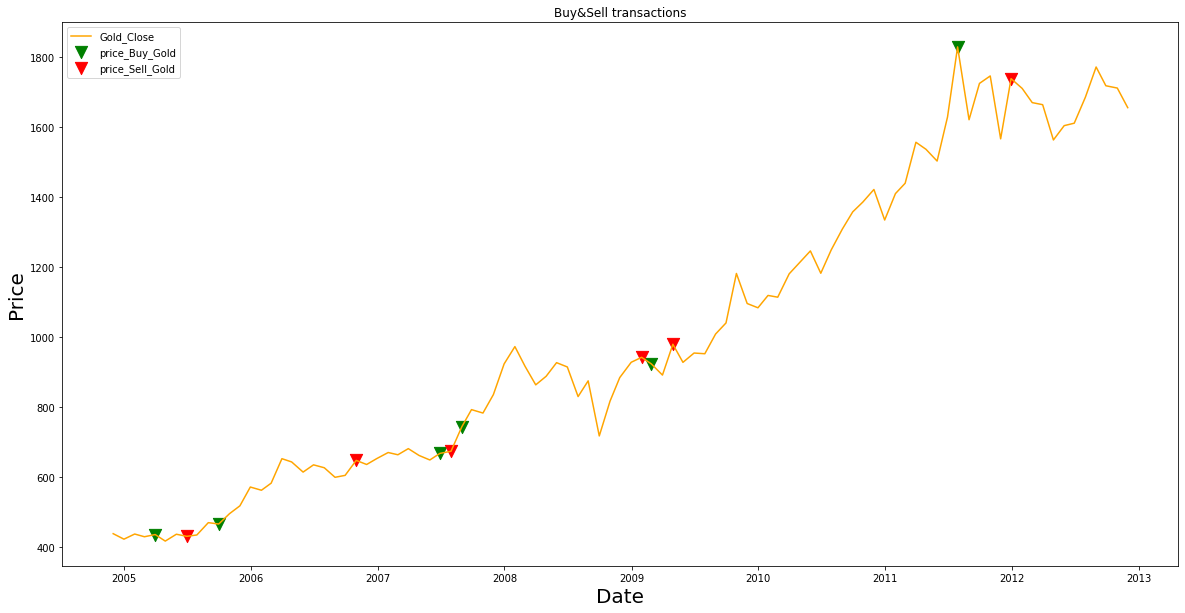

In [ ]:
x = range(Final_df.shape[0])
plt.figure(figsize=(20,10))

point_in_for_Gold = Exp_final['price_Buy_Gold']
point_out_for_Gold = abs(Exp_final['price_Sell_Gold'])

plt.plot(Final_df['Gold_Close'], color='orange', label='Gold_Close')
plt.scatter(Exp_final.index, point_in_for_Gold, label='price_Buy_Gold',color = 'green', marker = 'v',alpha = 1, s=150)
plt.scatter(Exp_final.index, point_out_for_Gold, label='price_Sell_Gold',color = 'red', marker = 'v',alpha = 1, s=150)
plt.title('Buy&Sell transactions')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

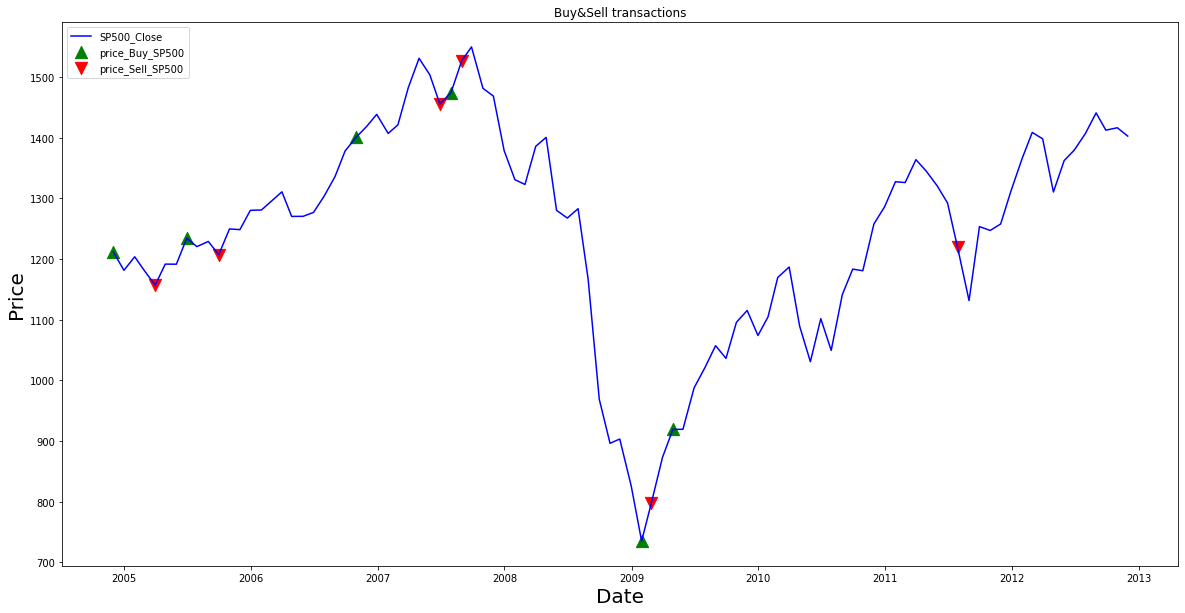

In [ ]:
x = range(Final_df.shape[0])
plt.figure(figsize=(20,10))

point_in_for_SP500 = Exp_final['price_Buy_SP500']
point_out_for_SP500 = abs(Exp_final['price_Sell_SP500'])


plt.plot(Final_df['SP500_Close'], color='blue', label='SP500_Close')
plt.scatter(Exp_final.index, point_in_for_SP500, label='price_Buy_SP500', color = 'green', marker = '^', alpha = 1, s=150)
plt.scatter(Exp_final.index, point_out_for_SP500, label='price_Sell_SP500',color = 'red', marker = 'v',alpha = 1, s=150)

plt.title('Buy&Sell transactions')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc='upper left')
plt.show()
